# Diabetes Prediction
Problem Statement : Predict whether a person has diabetes or not ?

Dataset Link: https://www.kaggle.com/johndasilva/diabetes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/App/kaggle_diabetes.csv')

## Exploring the dataset

In [5]:
dataset.shape

(2000, 9)

In [6]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
dataset.size

18000

In [10]:
dataset.ndim

2

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [13]:
dataset.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            2      138             62  ...                     0.127   47        1
1            0       84             82  ...                     0.233   23        0
2            0      145              0  ...                     0.630   31        1
3            0      135             68  ...                     0.365   24        1
4            1      139             62  ...                     0.536   21        0

[5 rows x 9 columns]

In [15]:
dataset.describe().T

count       mean  ...      75%     max
Pregnancies               2000.0    3.70350  ...    6.000   17.00
Glucose                   2000.0  121.18250  ...  141.000  199.00
BloodPressure             2000.0   69.14550  ...   80.000  122.00
SkinThickness             2000.0   20.93500  ...   32.000  110.00
Insulin                   2000.0   80.25400  ...  130.000  744.00
BMI                       2000.0   32.19300  ...   36.800   80.60
DiabetesPedigreeFunction  2000.0    0.47093  ...    0.624    2.42
Age                       2000.0   33.09050  ...   40.000   81.00
Outcome                   2000.0    0.34200  ...    1.000    1.00

[9 rows x 8 columns]

In [16]:
dataset.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [17]:
dataset = dataset.rename(columns={'DiabetesPedigreeFunction':'DPF'})
dataset.head()

Pregnancies  Glucose  BloodPressure  ...    DPF  Age  Outcome
0            2      138             62  ...  0.127   47        1
1            0       84             82  ...  0.233   23        0
2            0      145              0  ...  0.630   31        1
3            0      135             68  ...  0.365   24        1
4            1      139             62  ...  0.536   21        0

[5 rows x 9 columns]

In [18]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


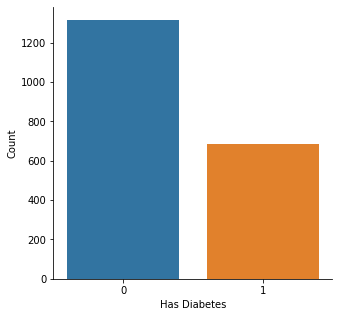

In [28]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outcome' , data=dataset)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

# Data Cleaning

In [29]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = dataset.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

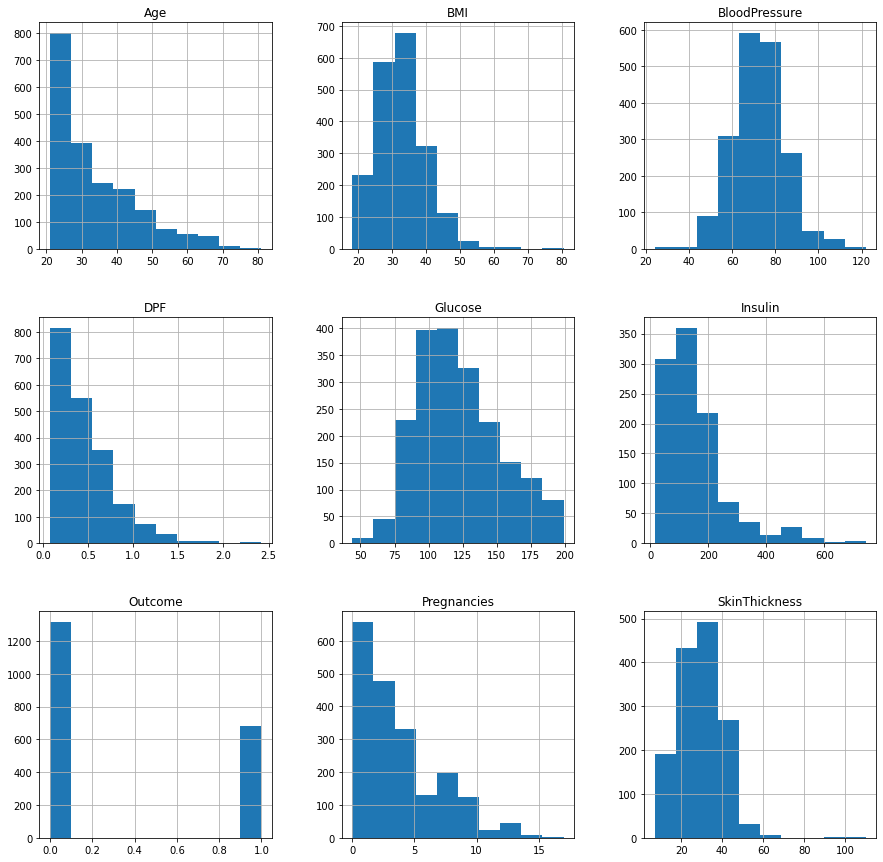

In [30]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))

In [0]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean() , inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [32]:
df_copy.head()

Pregnancies  Glucose  BloodPressure  ...    DPF  Age  Outcome
0            2    138.0      62.000000  ...  0.127   47        1
1            0     84.0      82.000000  ...  0.233   23        0
2            0    145.0      72.403665  ...  0.630   31        1
3            0    135.0      68.000000  ...  0.365   24        1
4            1    139.0      62.000000  ...  0.536   21        0

[5 rows x 9 columns]

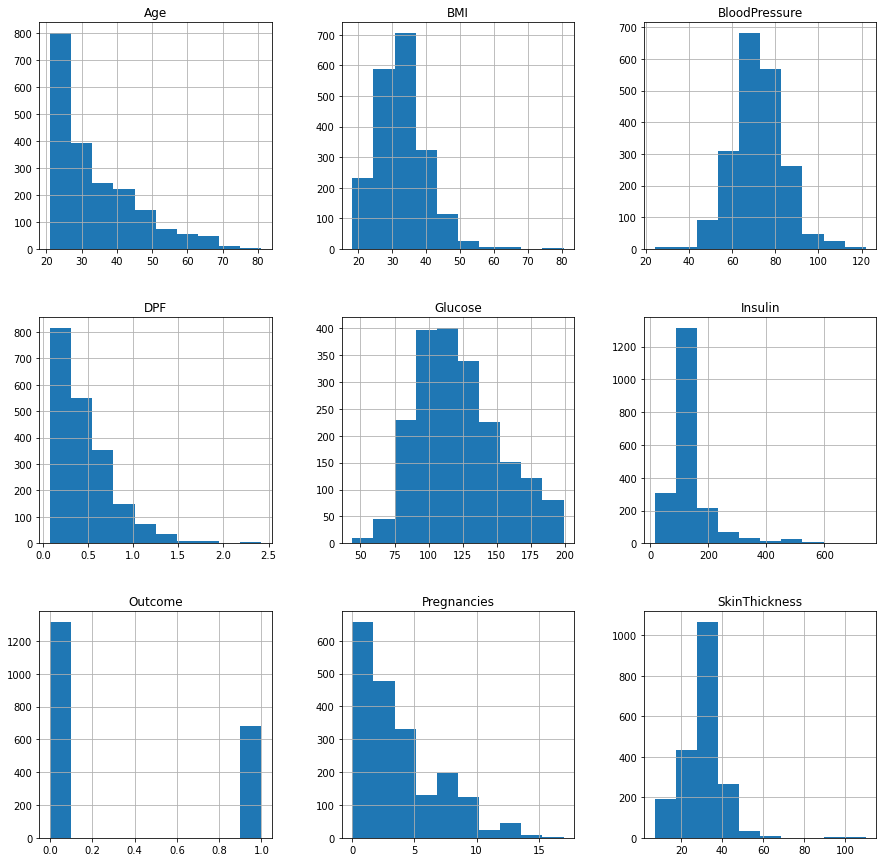

In [33]:
# Plotting histogram of dataset after replacing NaN values
p = df_copy.hist(figsize=(15,15))

In [34]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

# Model Building

In [37]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns='Outcome')
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (1600, 8), X_test size: (400, 8)


In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Now we will applying the Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr.predict_proba(X_test)[:5]

array([[0.55114475, 0.44885525],
       [0.87832368, 0.12167632],
       [0.1738464 , 0.8261536 ],
       [0.75967689, 0.24032311],
       [0.4149898 , 0.5850102 ]])

In [42]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[243,  29],
       [ 59,  69]])

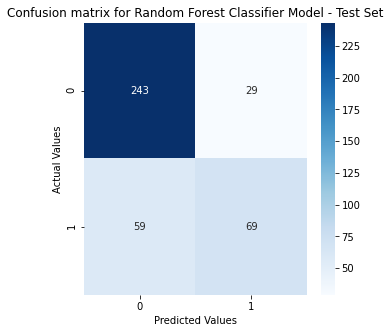

In [43]:
# Plotting the confusion matrix
plt.figure(figsize=(5,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [0]:
score = round(accuracy_score(y_test, y_pred),4)*100

In [46]:
score

78.0

In [0]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DPF)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    x = sc.transform(x)

    return lr.predict(x)

In [48]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [49]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.


In [50]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 120, 92, 24,170, 36.1, 0.551, 90)[0]
if prediction:
  print('Oops! You have diabetes.')
else:
  print("Great! You don't have diabetes.")

Great! You don't have diabetes.
